In [11]:
import pandas as pd
import numpy as np

In [12]:
file_name = 'data/cyan_ndvi_points.csv'
df = pd.read_csv(file_name)
# new column id is lat * lon
df['id'] = df['lat'] * df['lon']
# change each id into a unique integer
df['id'] = df['id'].astype('category').cat.codes
# convert the time column to datetime
df['time'] = pd.to_datetime(df['time'])

In [18]:
df.head()

,Unnamed: 0,point,time,lat,lon,ndvi.sentinel2,qa.sentinel2,ndvi.streambatch,source.streambatch,qa_sentinel2,source_streambatch,real-obs-sentinel2,real-obs-streambatch,id
35006,1980,0,2022-08-02,-21.760152,-48.601963,0.239726,1.0,0.249575,3.0,True,True,True,True,50
35016,1990,0,2022-08-12,-21.760152,-48.601963,0.220375,1.0,0.243107,3.0,True,True,True,True,50
35026,2000,0,2022-08-22,-21.760152,-48.601963,0.201458,1.0,0.217890,3.0,True,True,True,True,50
35031,2005,0,2022-08-27,-21.760152,-48.601963,0.202089,1.0,0.218341,3.0,True,True,True,True,50
35036,2010,0,2022-09-01,-21.760152,-48.601963,0.210789,1.0,0.224127,3.0,True,True,True,True,50


In [13]:
s2 = df.copy()
#remove rows where qa.sentinel2 is not 1
s2 = s2[s2['qa.sentinel2'] == 1]
# remove rows where ndvi.sentinel2 is the same as the previous row
s2 = s2[s2['ndvi.sentinel2'] != s2['ndvi.sentinel2'].shift(1)]

In [14]:
l8 = df.copy()
# select only rows where source.streambatch == 2.0
l8 = l8[l8['source.streambatch'] == 2]

In [15]:
modis = df.copy()
# select only rows where source.streambatch == 1.0
modis = modis[modis['source.streambatch'] == 1.0]

NDVI for [-21.75826748942076, -48.593540037918864]


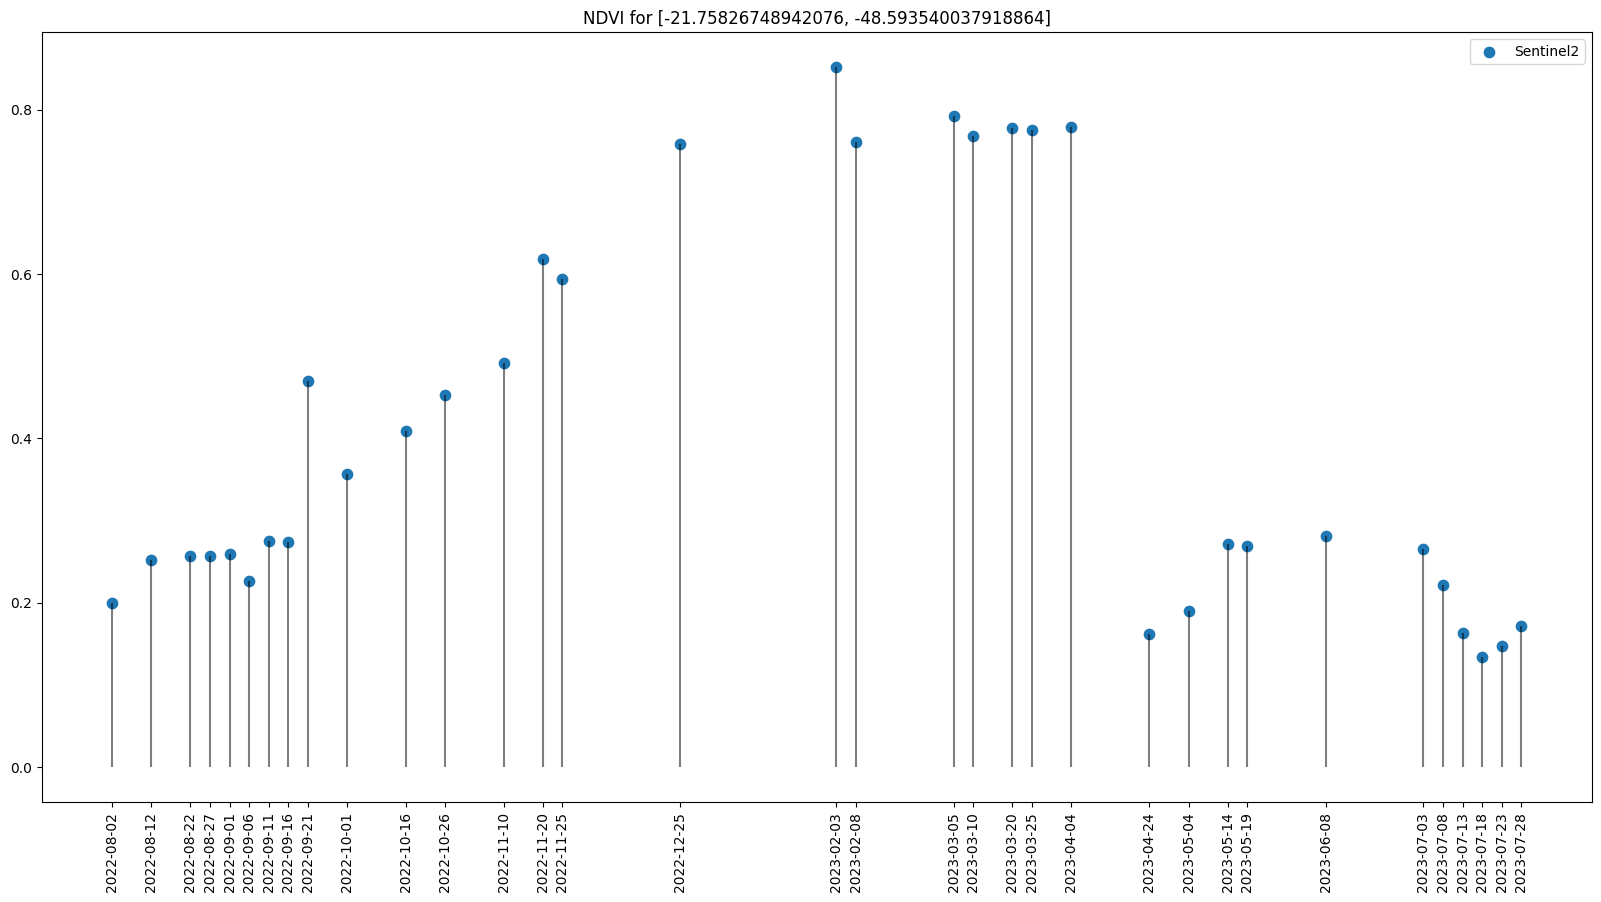

NDVI for [-21.76485993840353, -48.59354286318768]


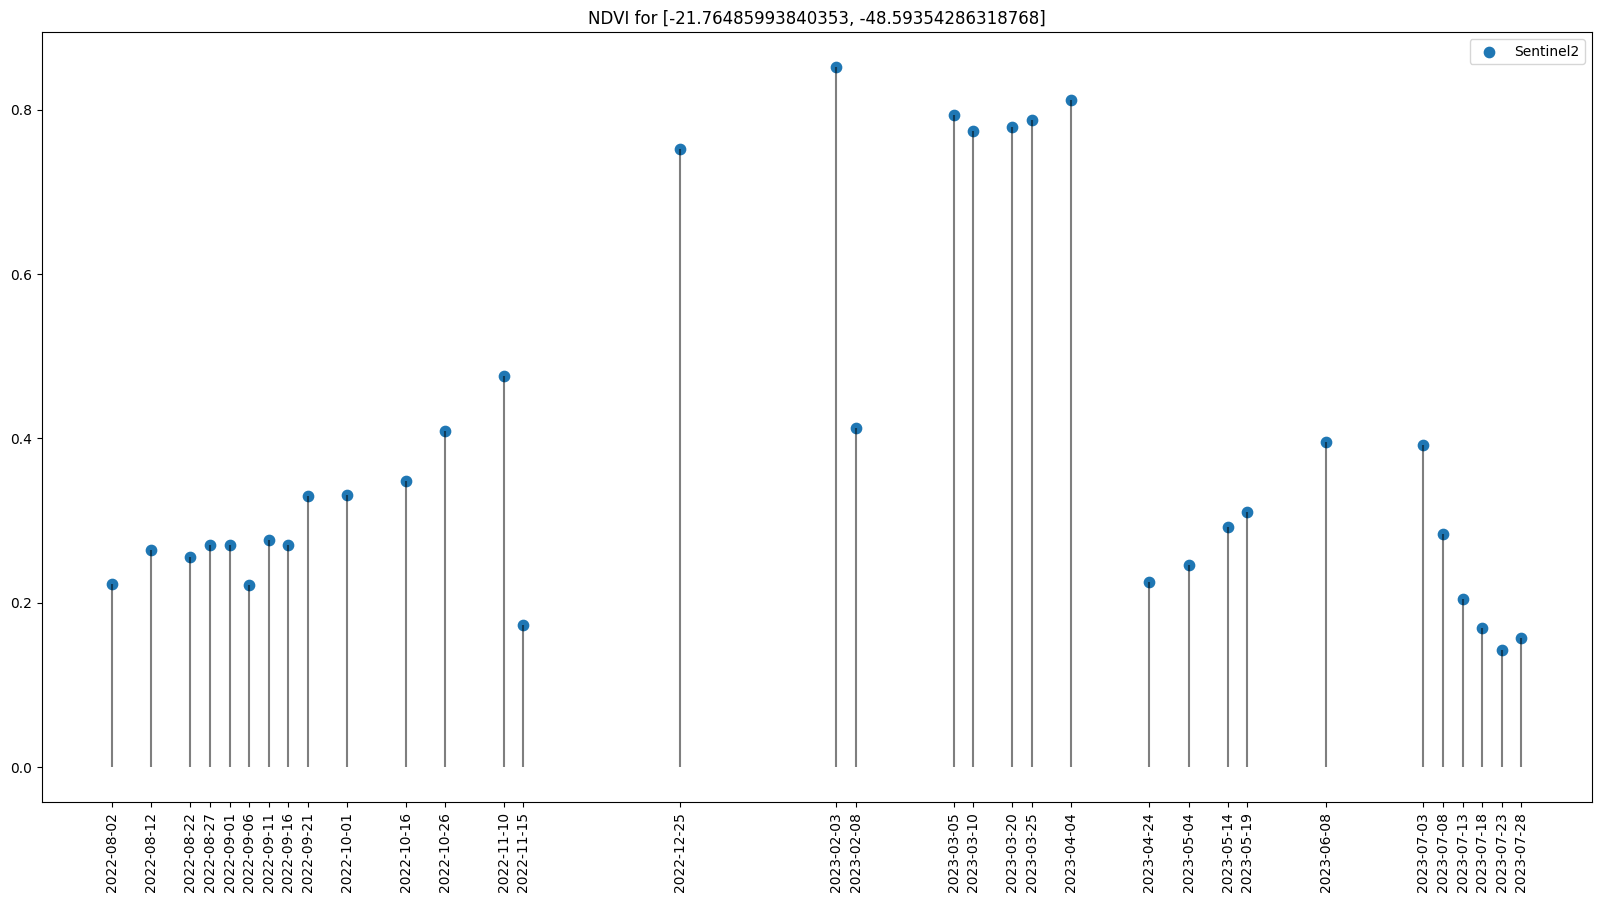

NDVI for [-21.762676453980774, -48.59529770748579]


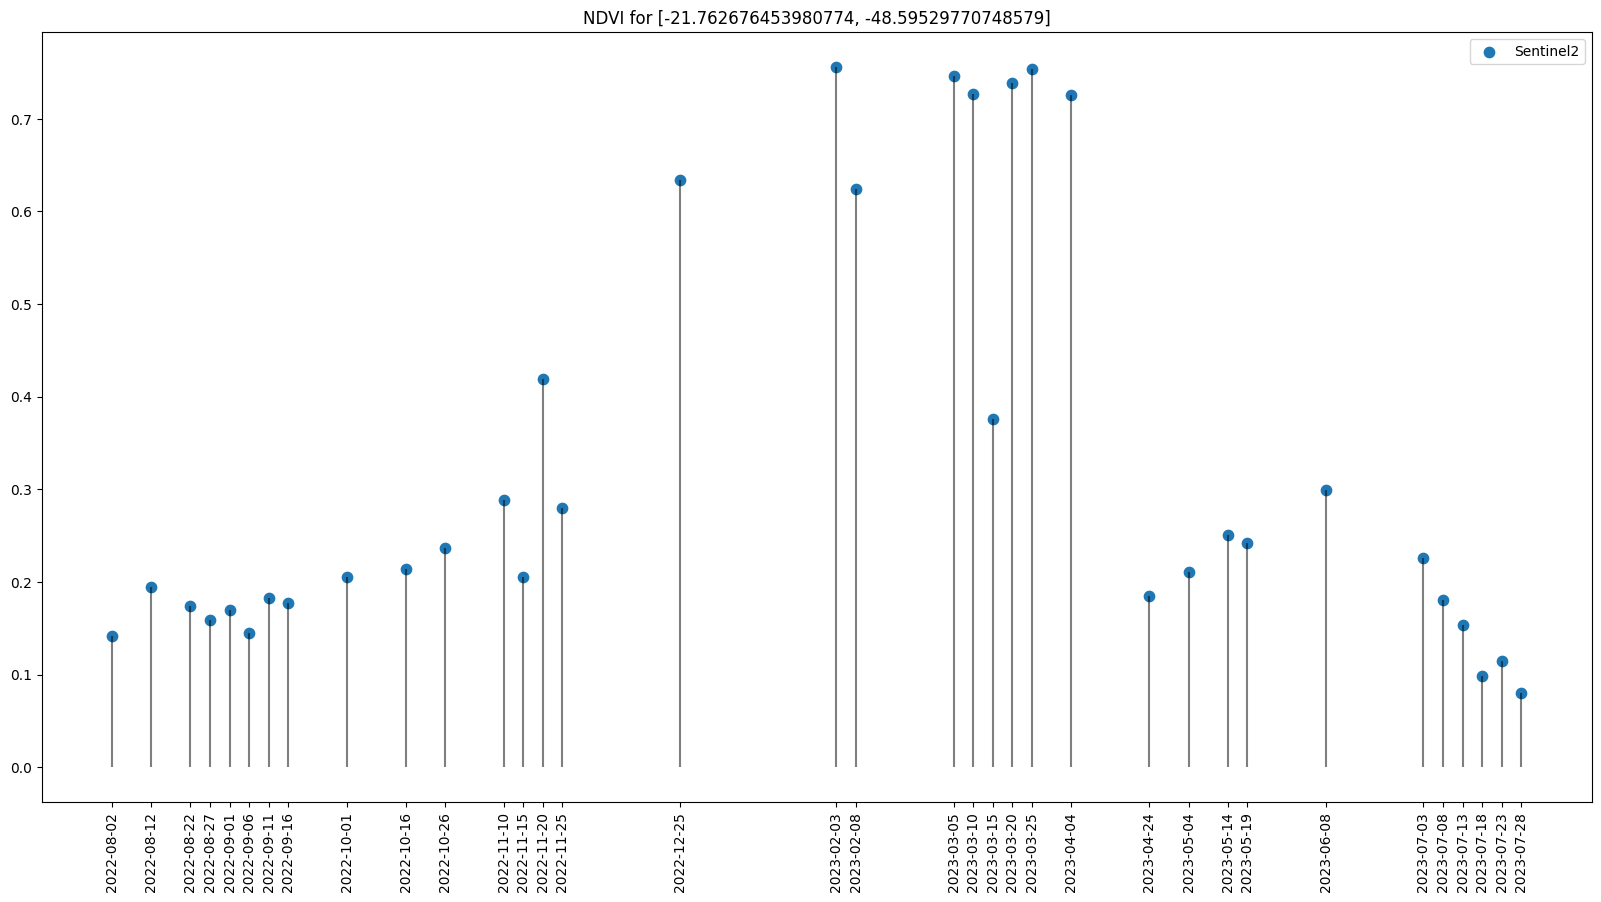

NDVI for [-21.766834714302867, -48.59433388792248]


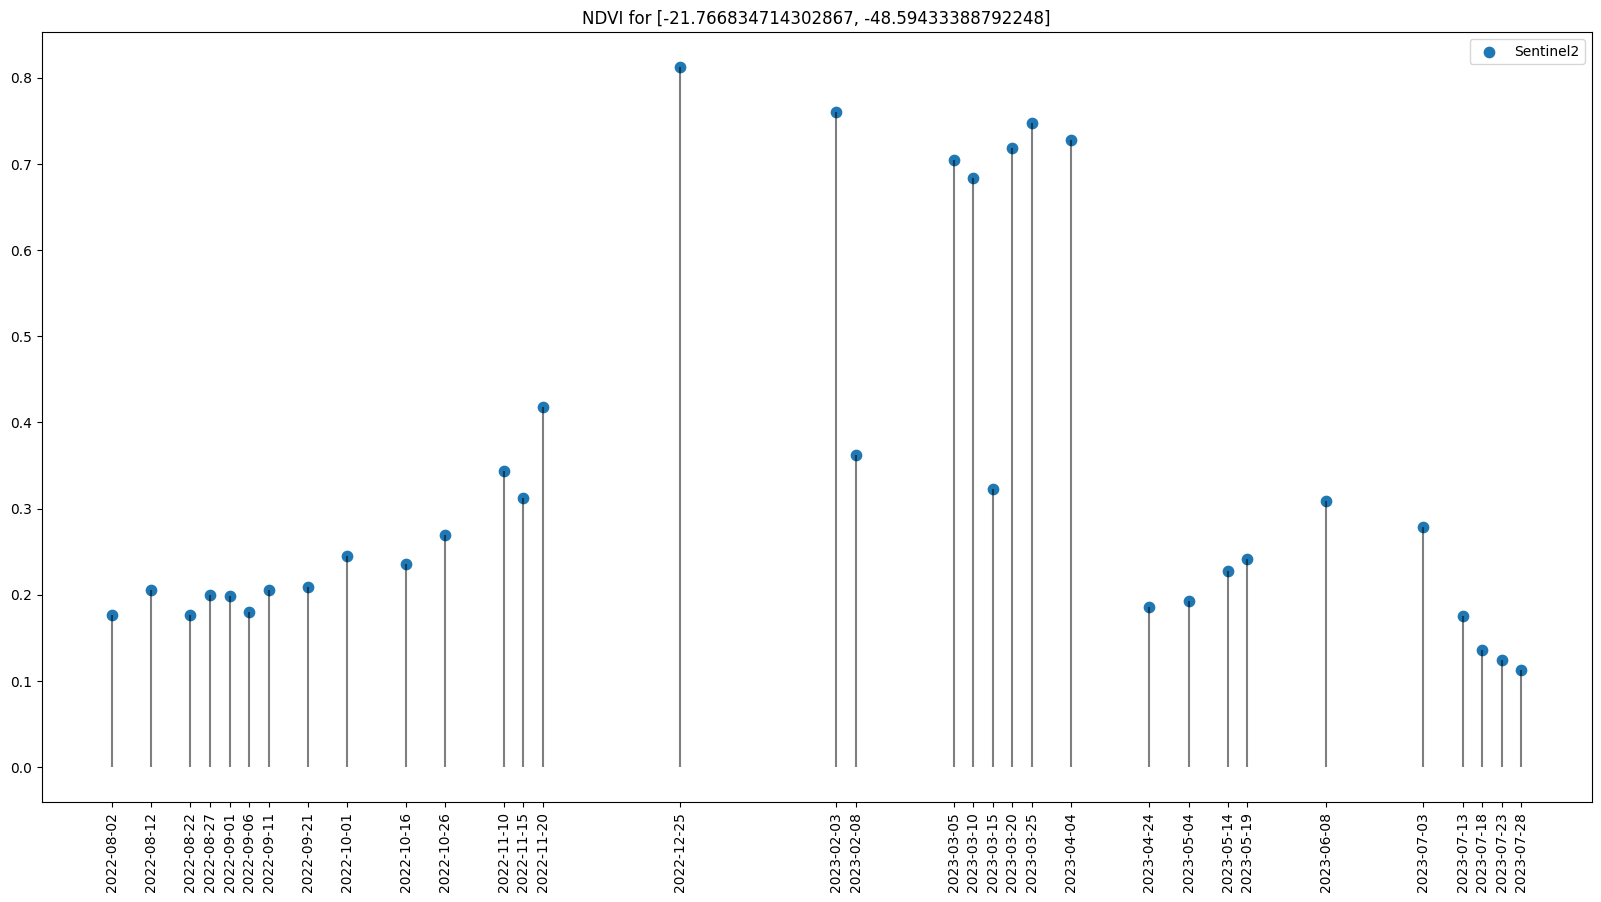

NDVI for [-21.75743674454827, -48.59450596884756]


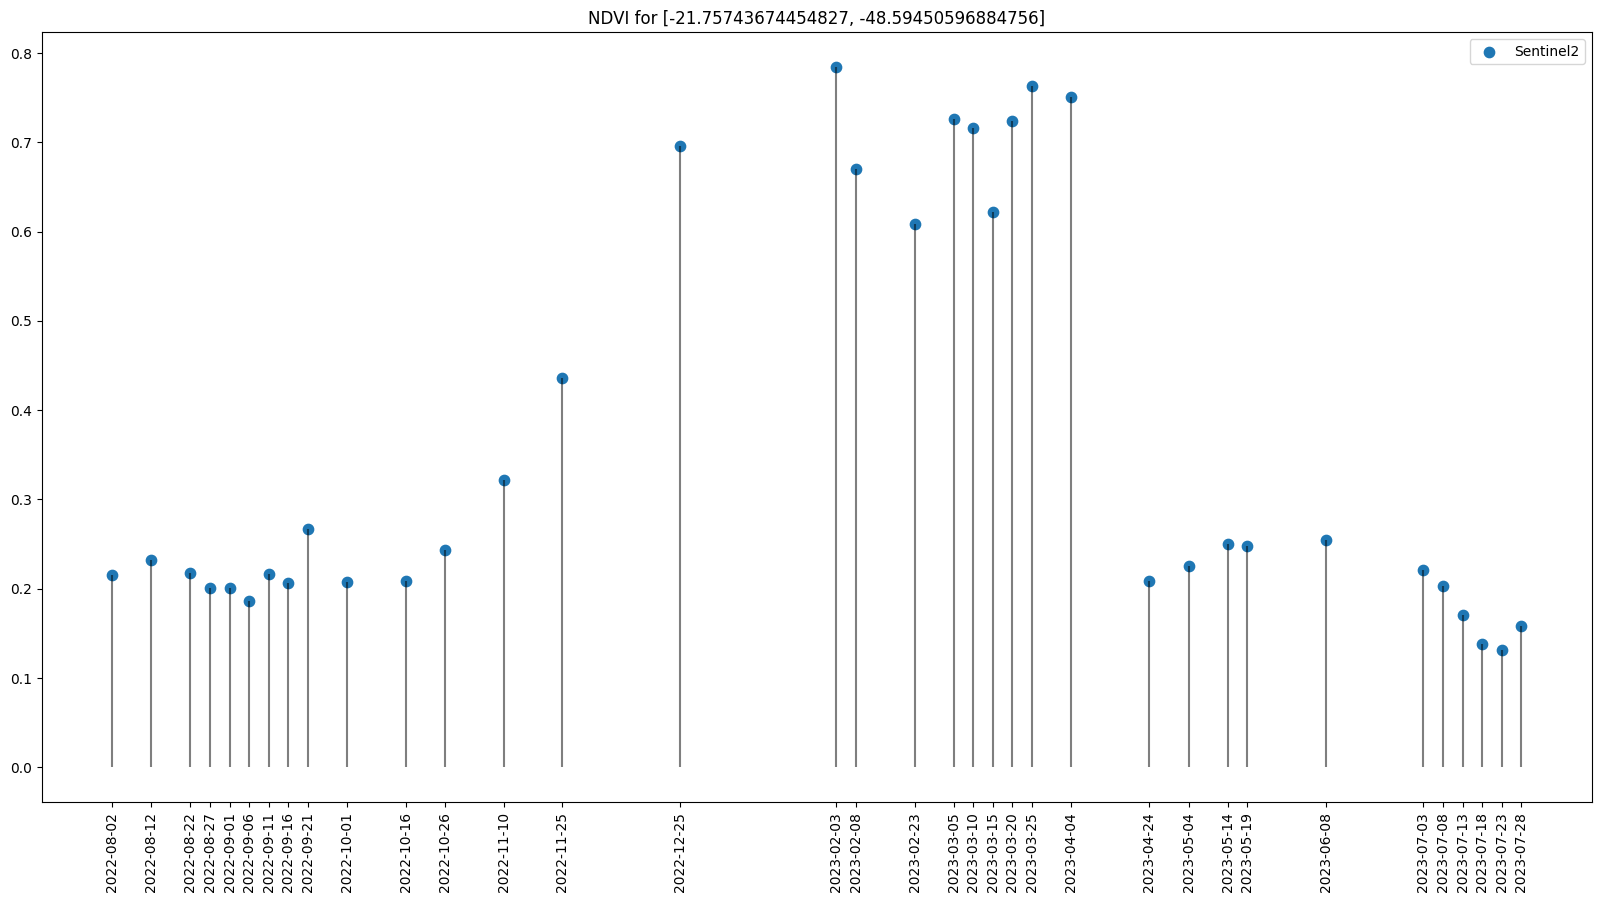

NDVI for [-21.76094272610307, -48.59620142938738]


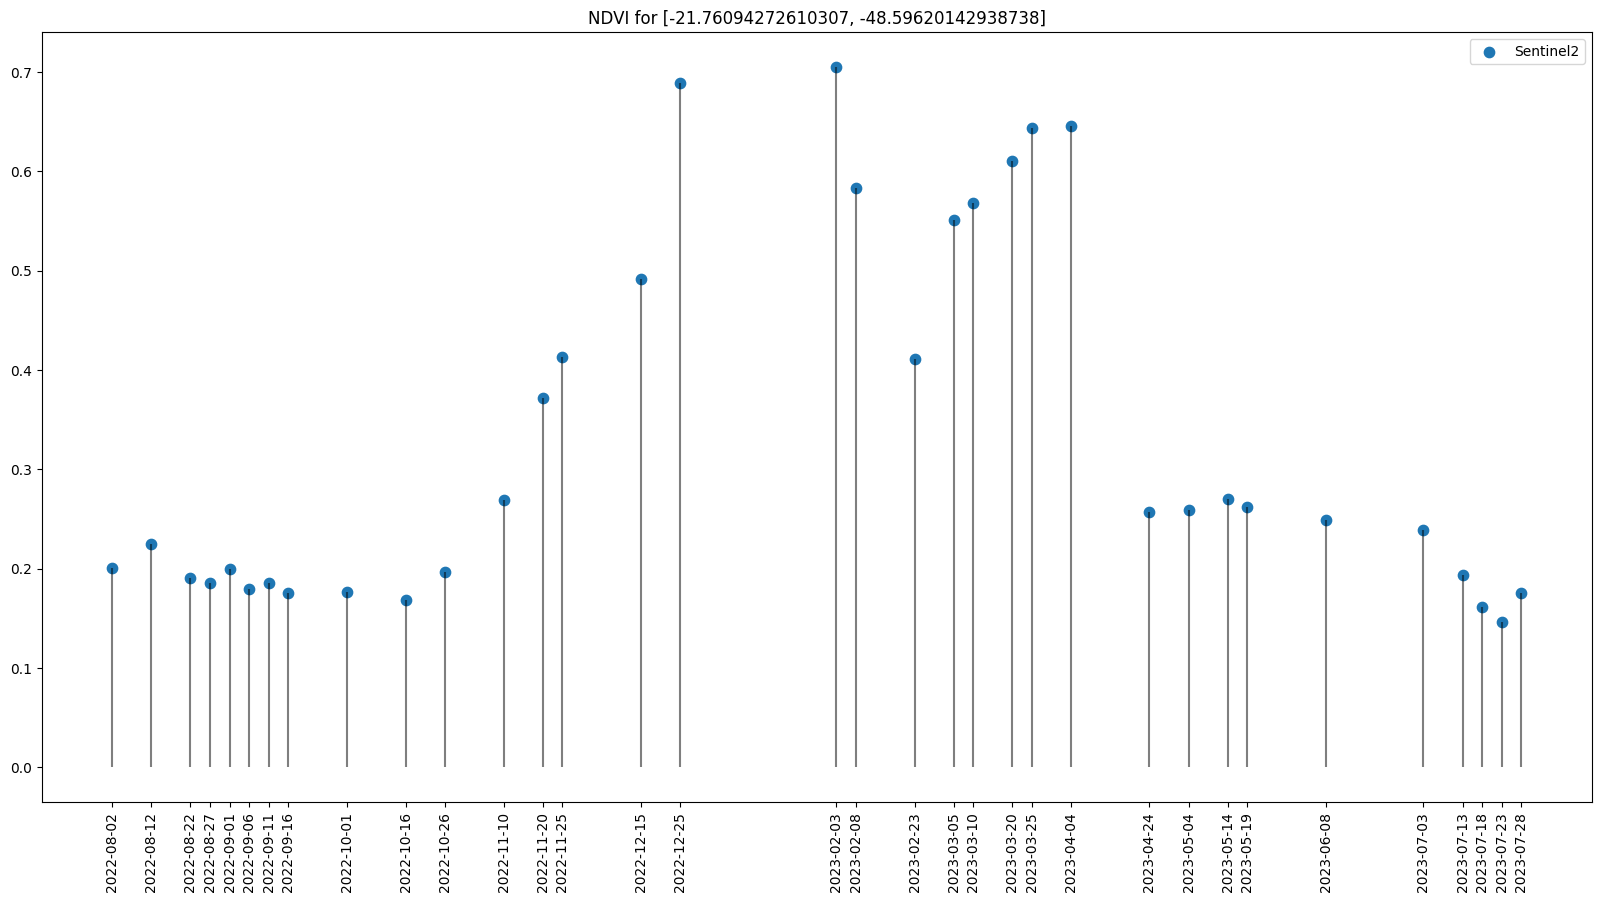

NDVI for [-21.7654851602076, -48.597105132913015]


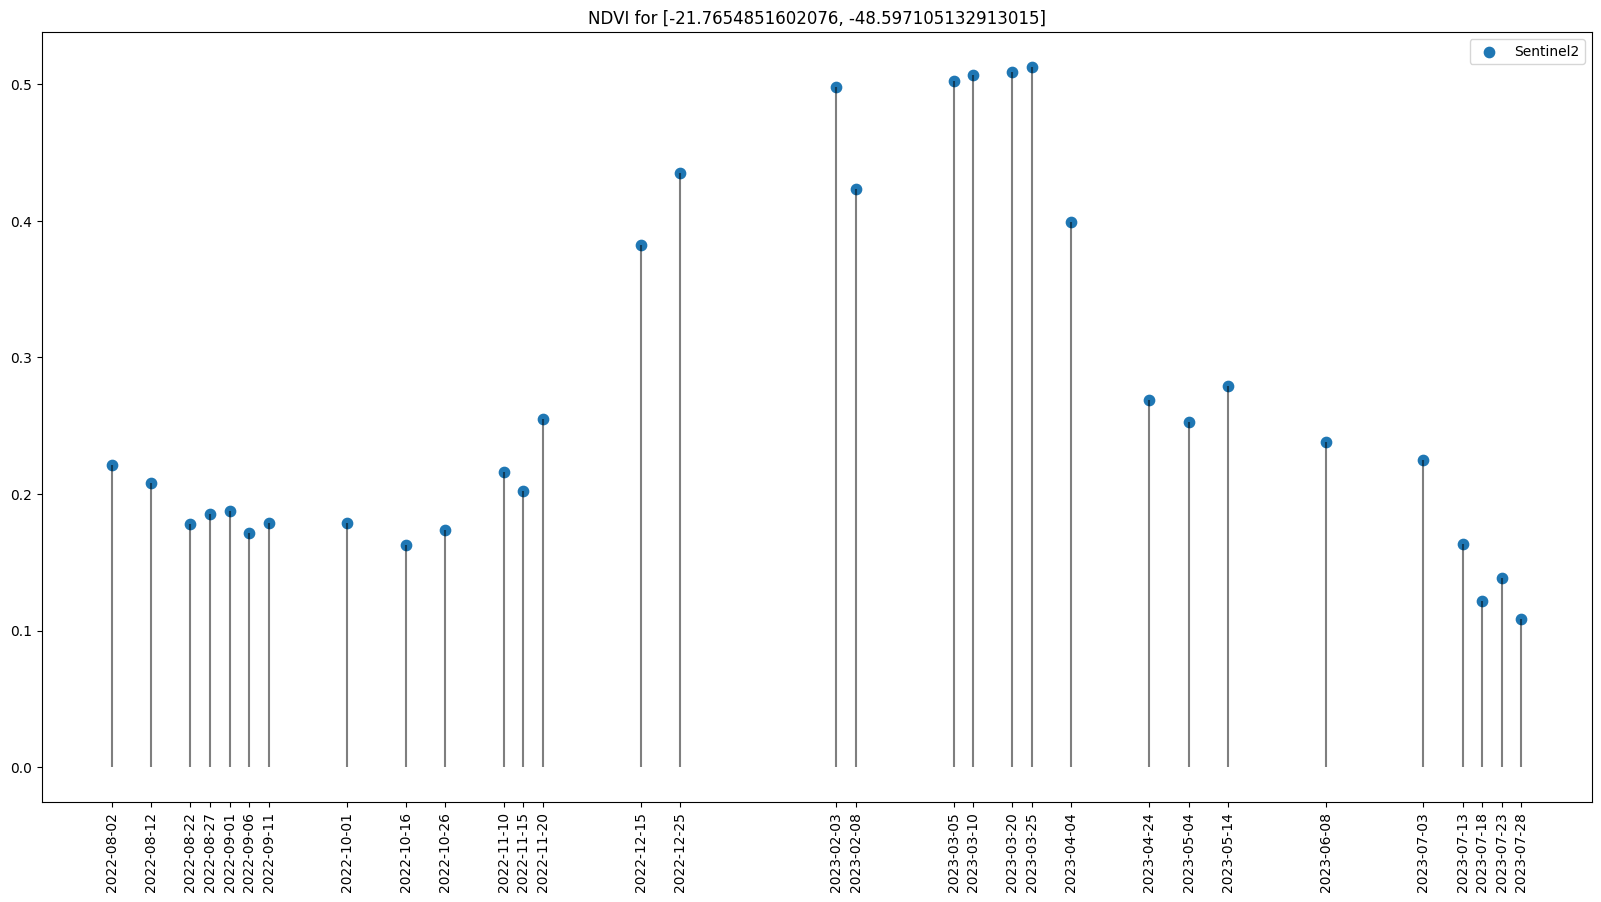

NDVI for [-21.756159814277016, -48.59557896448716]


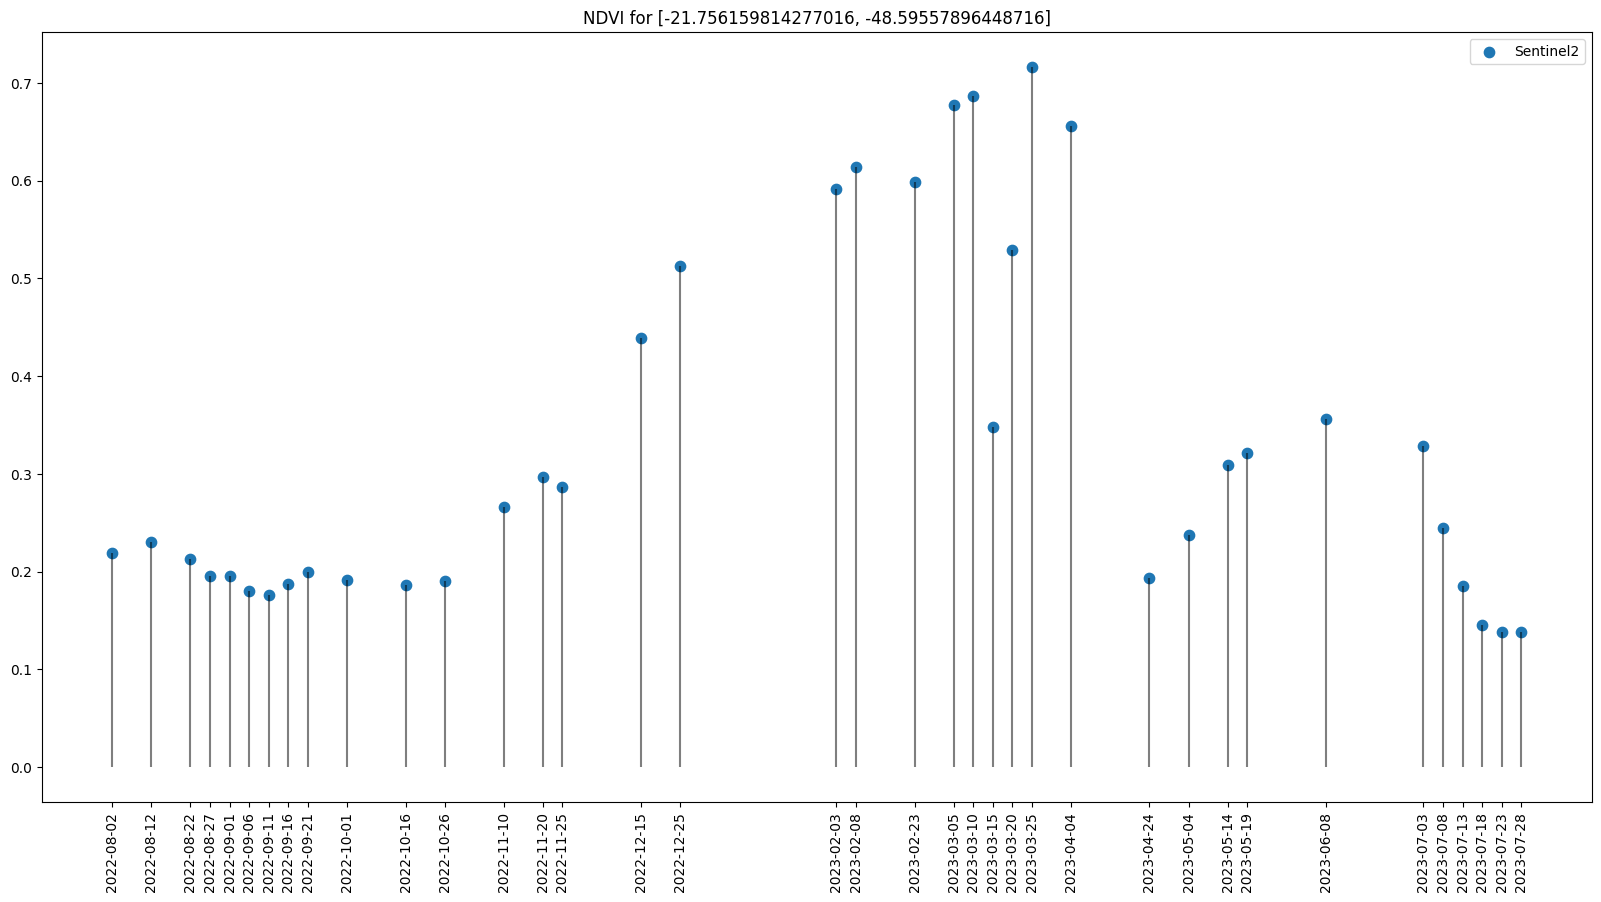

NDVI for [-21.76049803420741, -48.5985717475597]


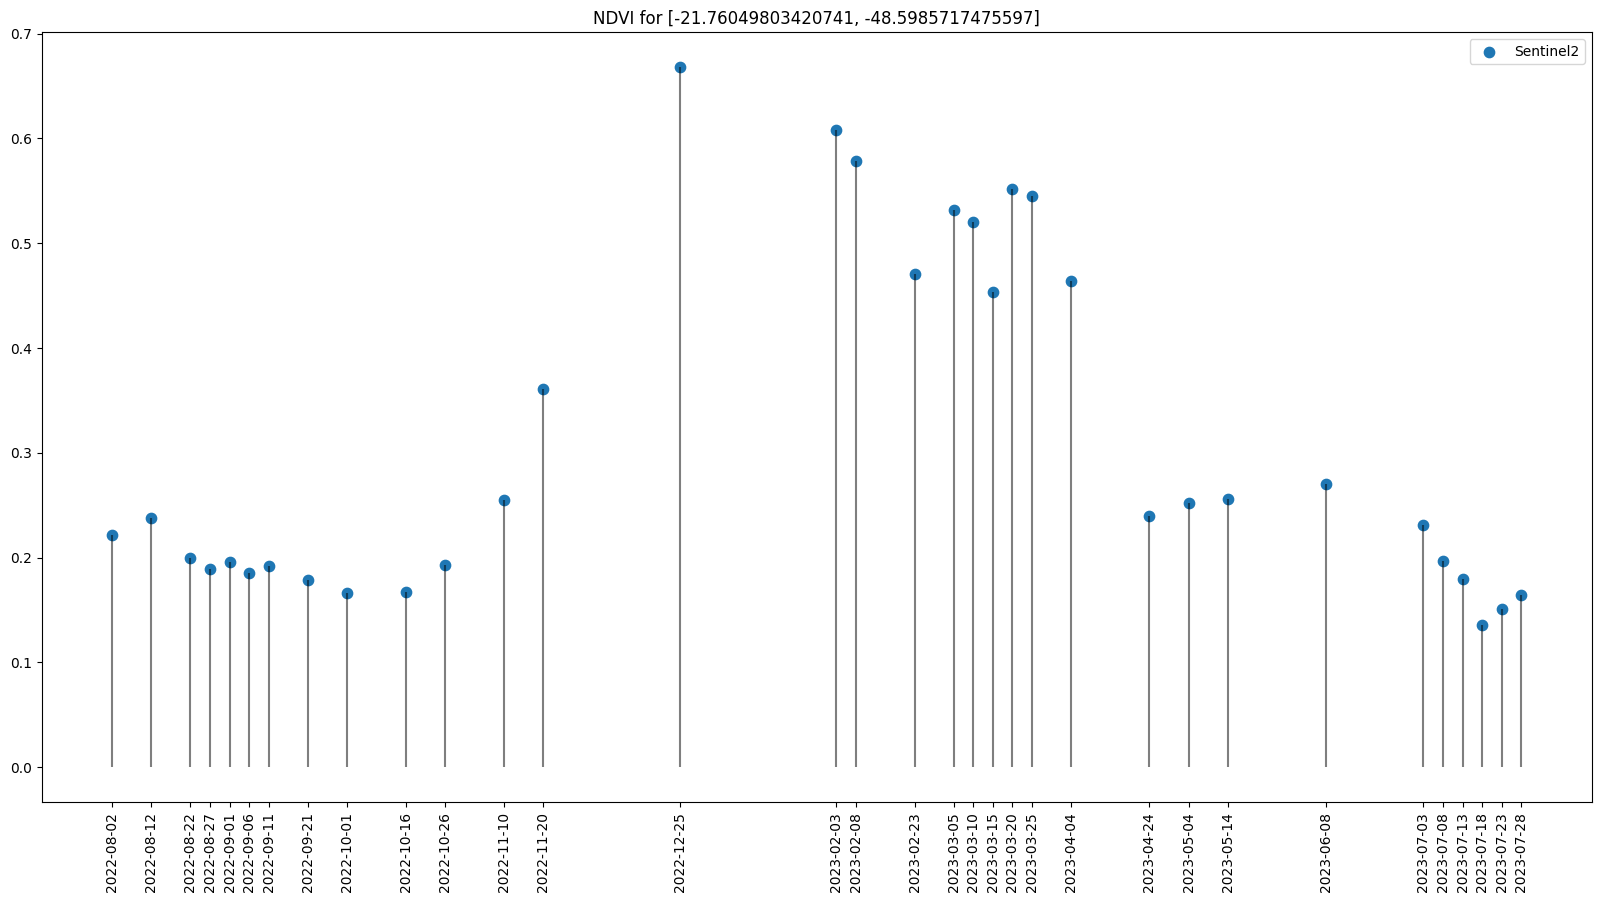

NDVI for [-21.764524528591696, -48.59989834156119]


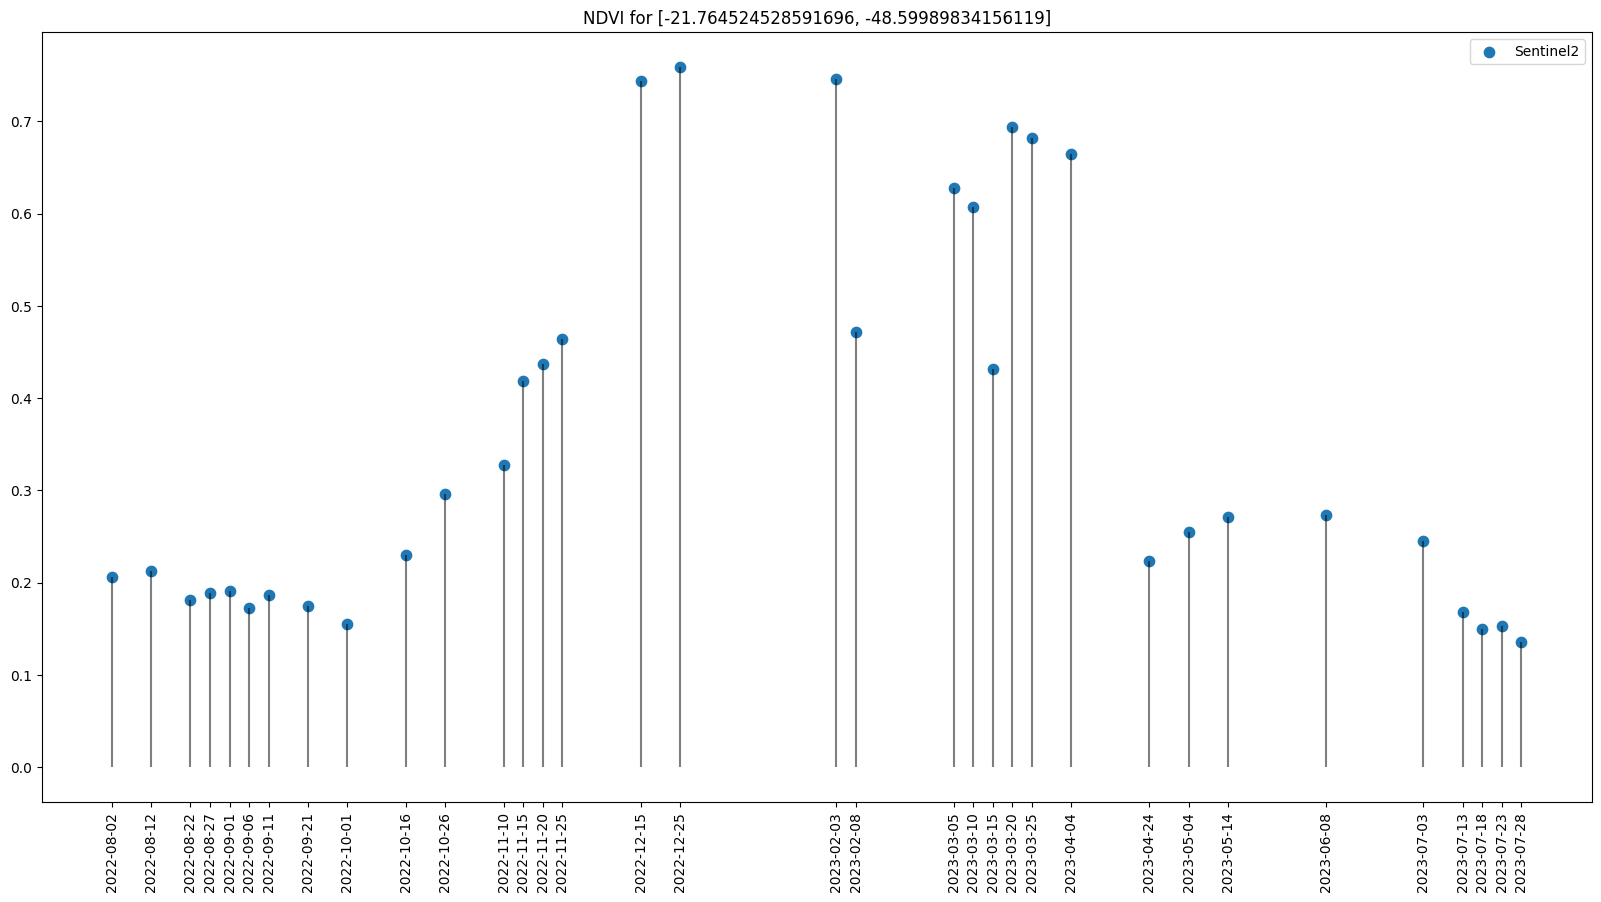

NDVI for [-21.76448524968548, -48.60197990455381]


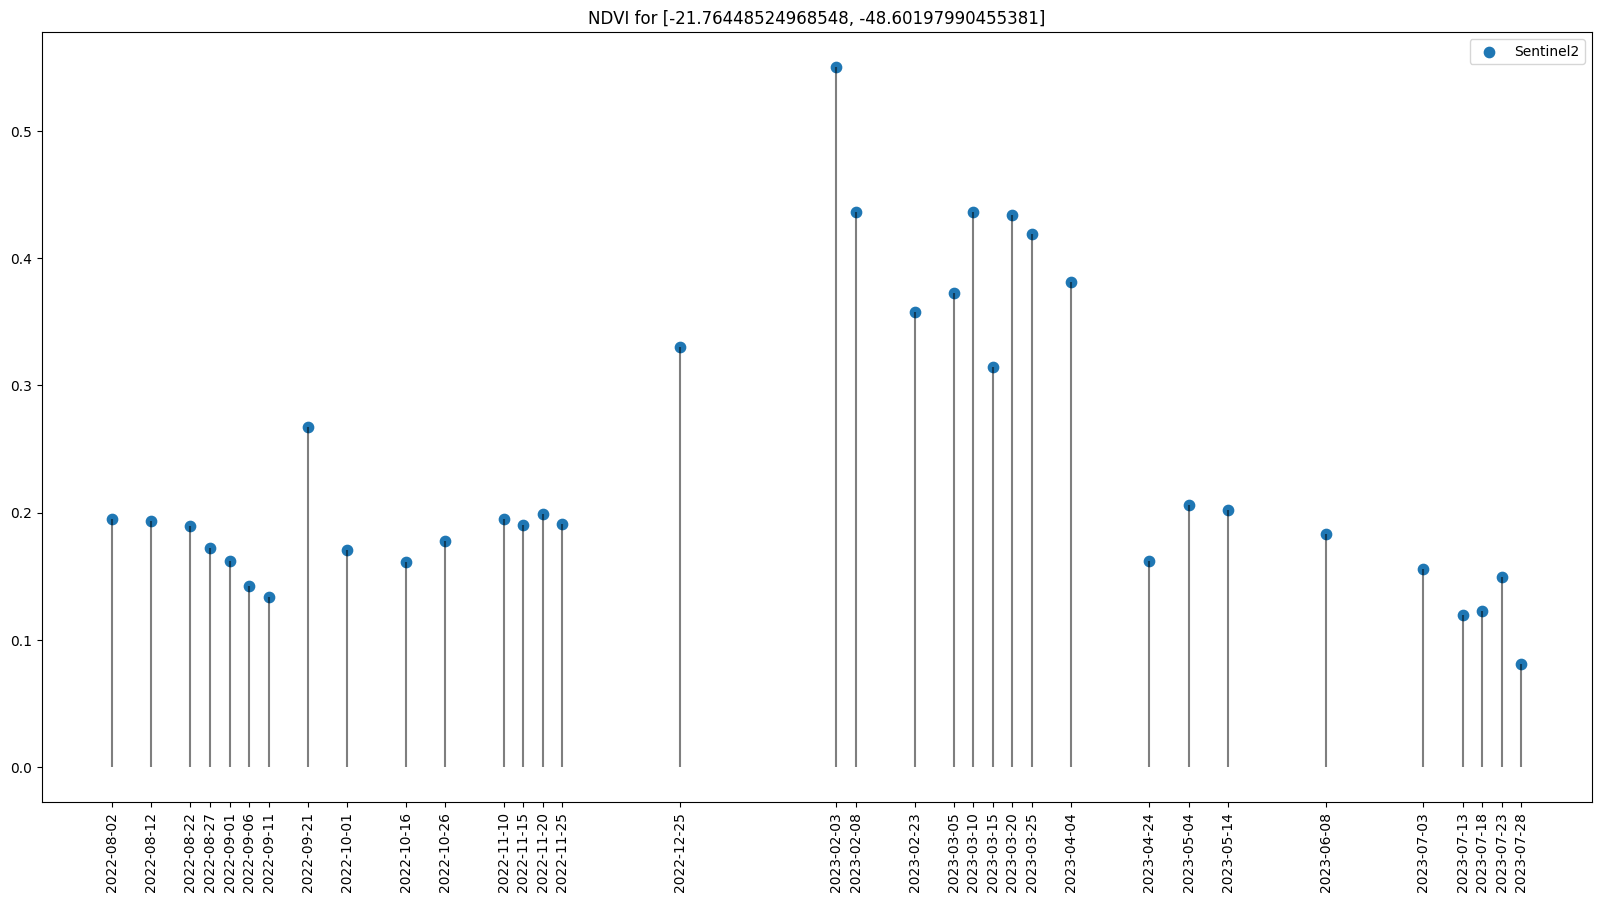

NDVI for [-21.75632281375492, -48.59780568438073]


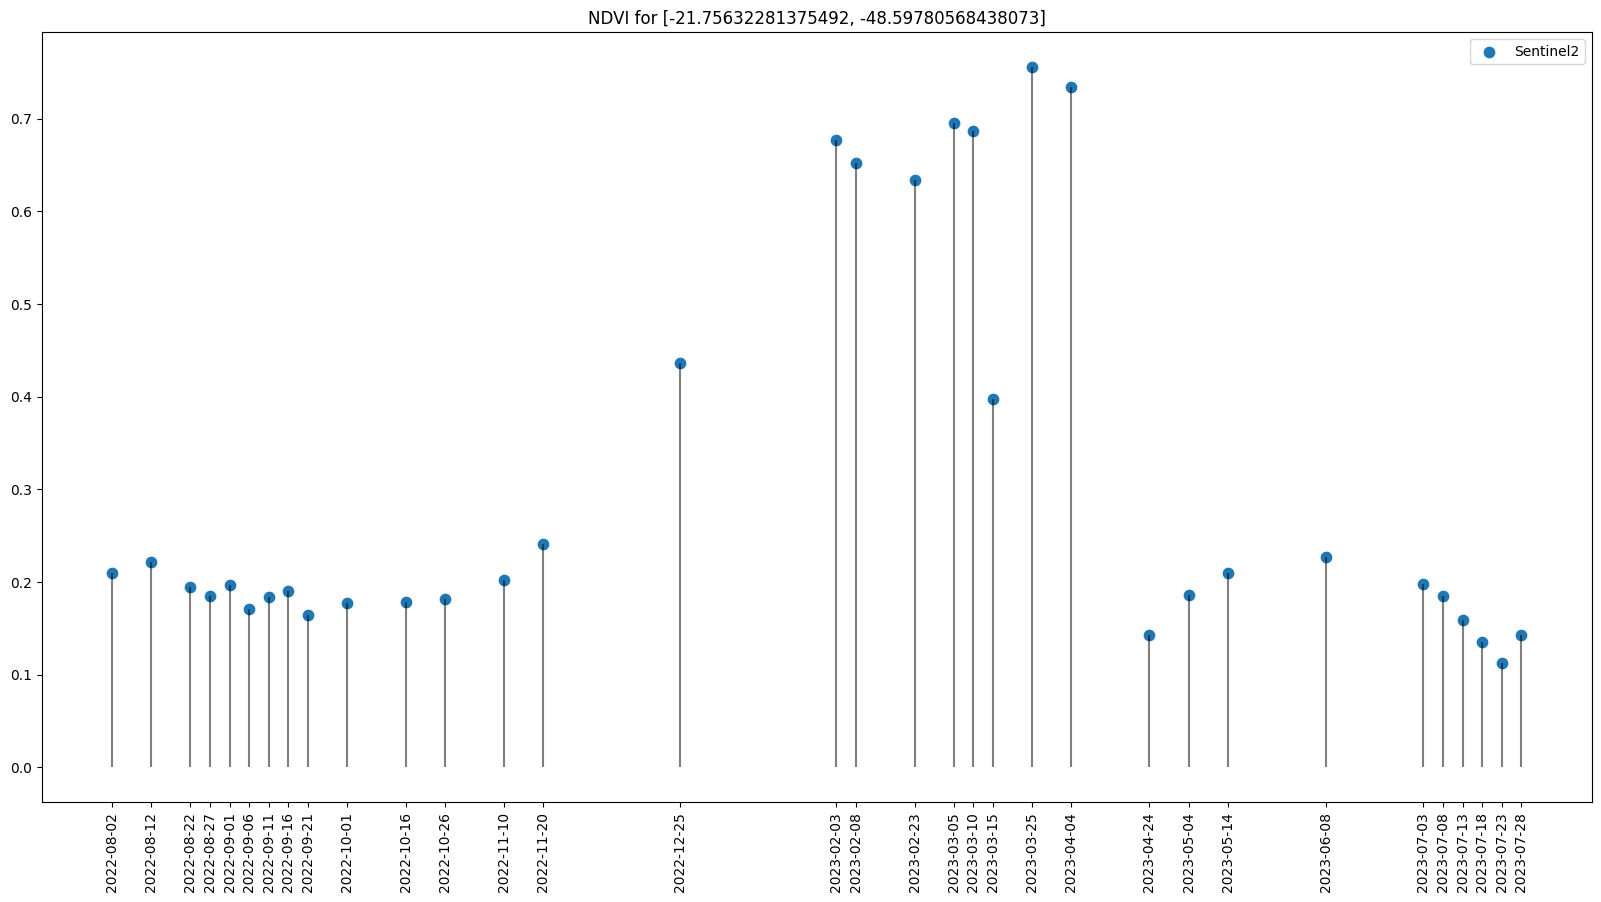

NDVI for [-21.759681348743623, -48.59995634433941]


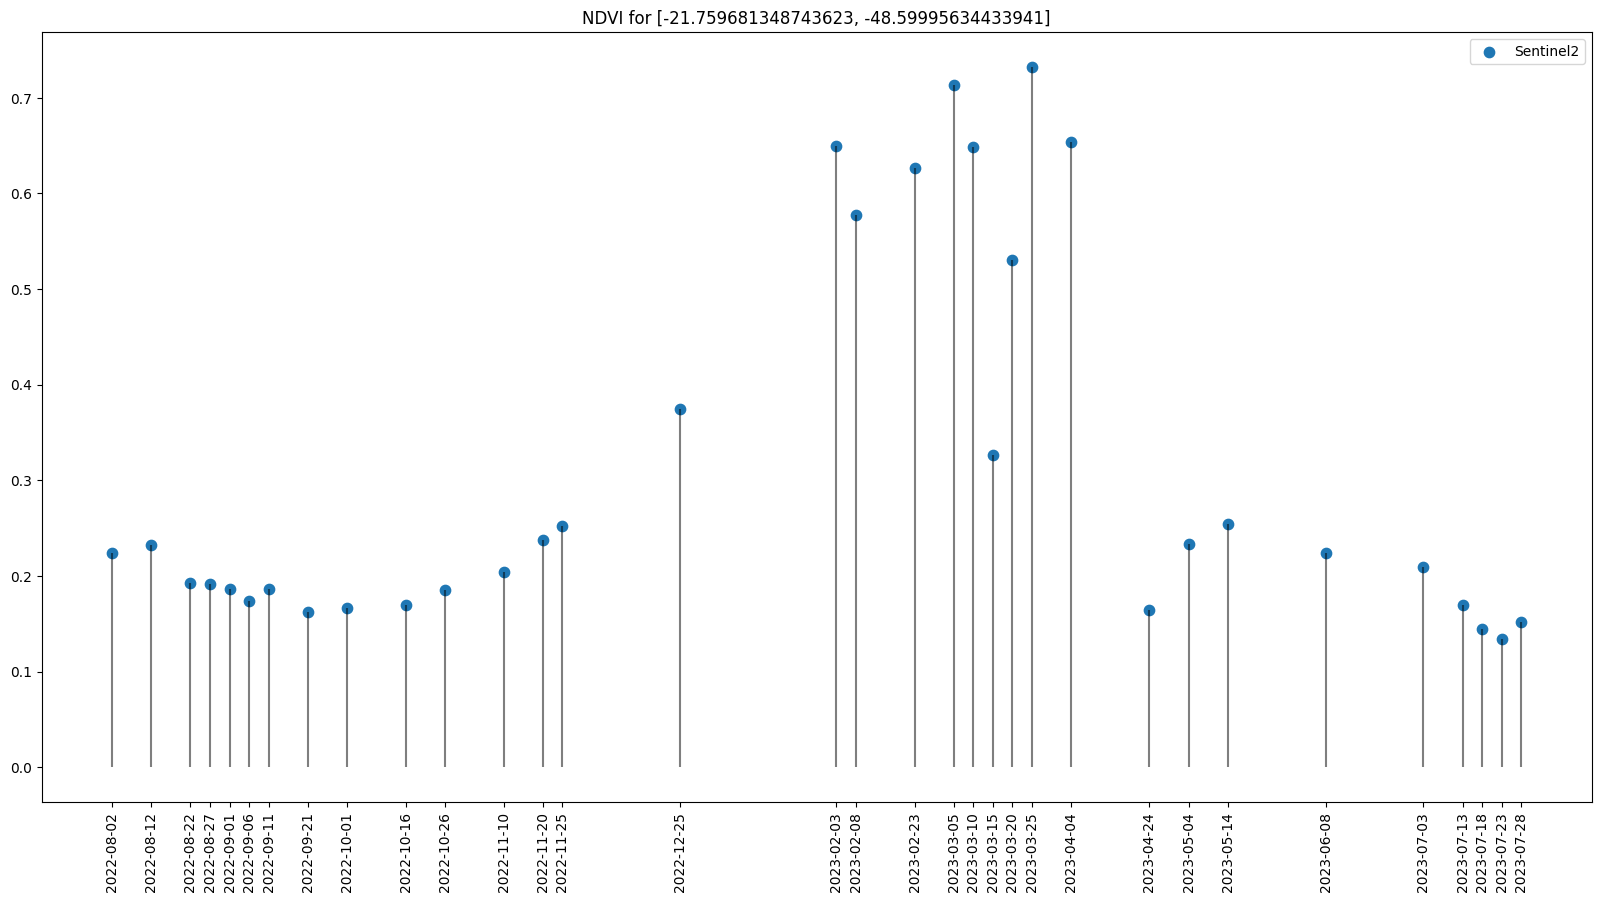

NDVI for [-21.75664485708694, -48.600127277524784]


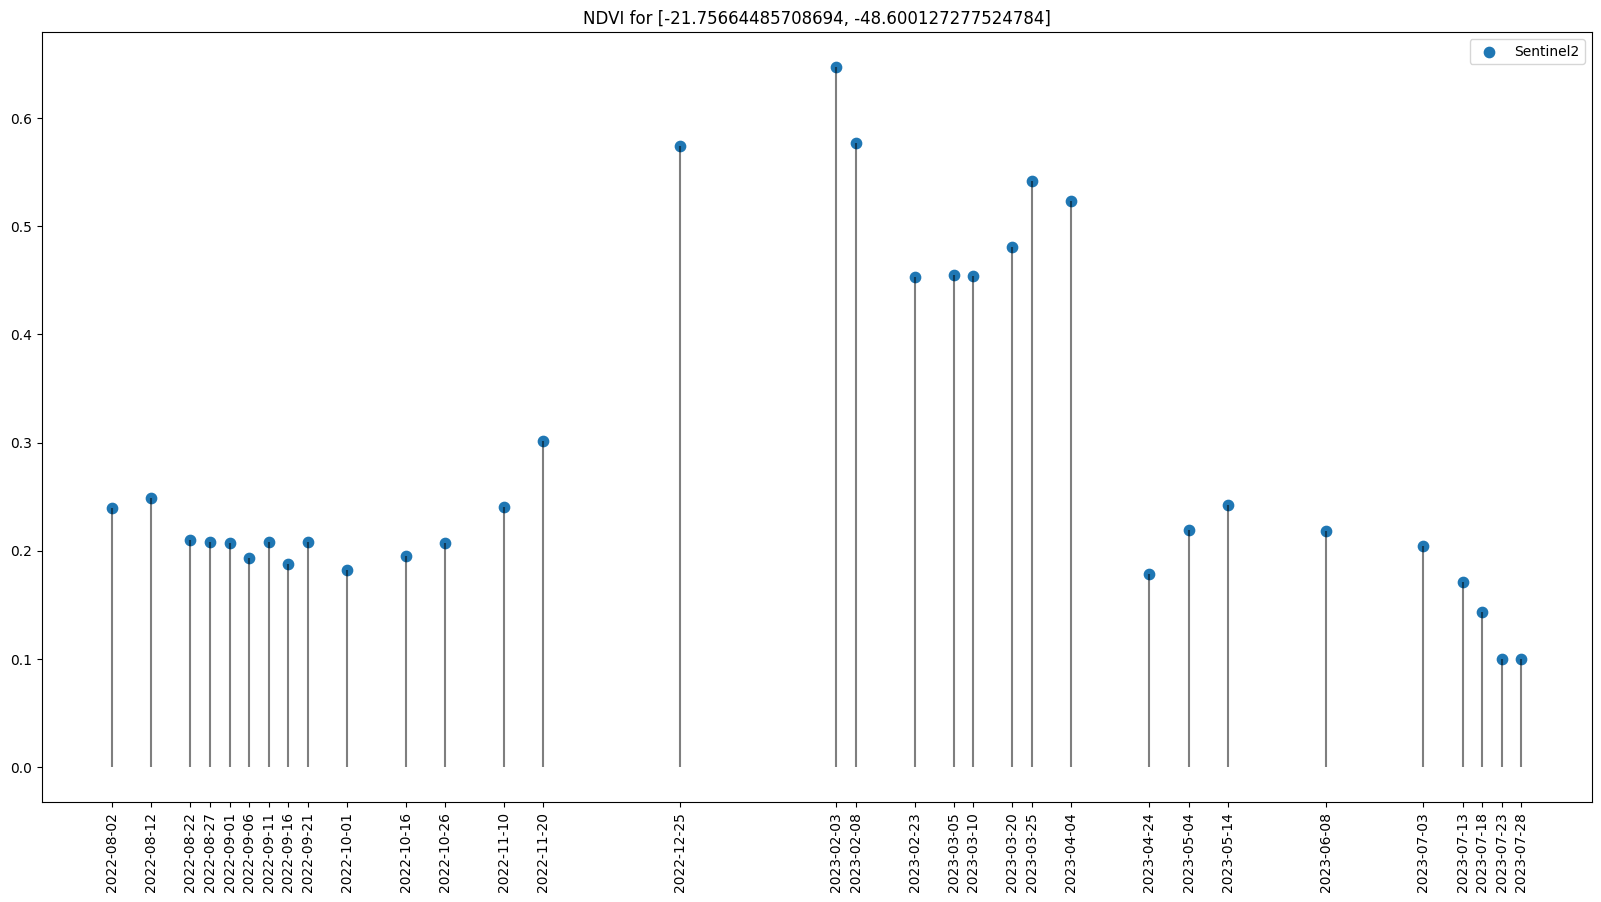

NDVI for [-21.76015150537817, -48.60196296127184]


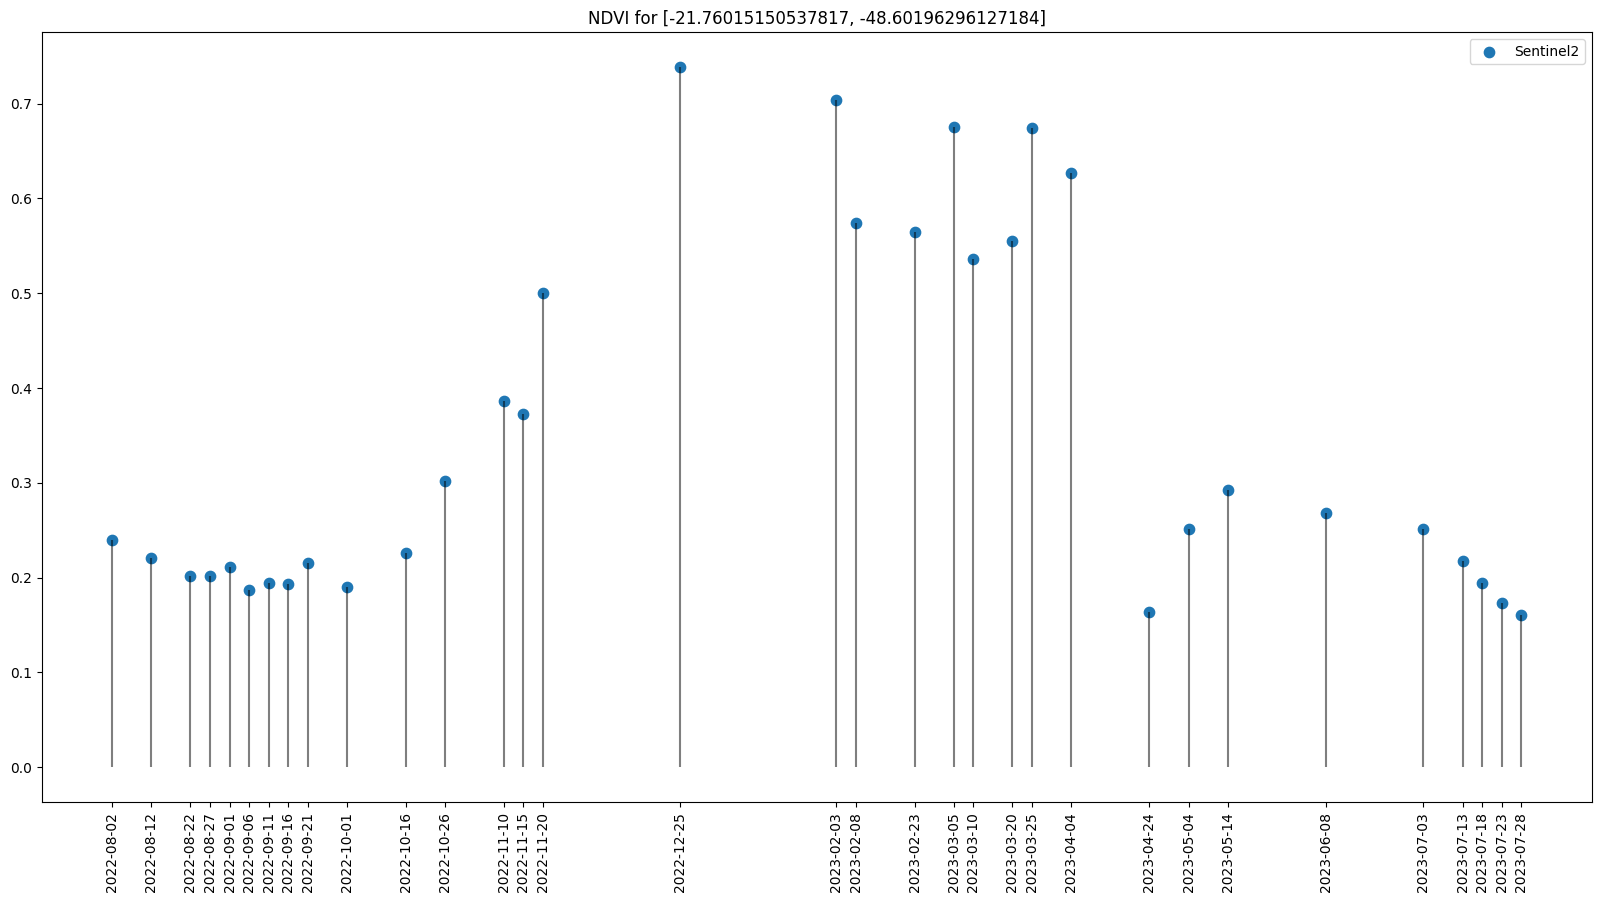

In [17]:
import matplotlib.pyplot as plt

year = 2022

for id in s2['id'].unique()[0:15]:
    df = s2[s2['id'] == id]
    df = df[df['time'] >= f'{year}-08-01']
    df = df[df['time'] <= f'{year+1}-08-01']
    l81 = l8[l8['id'] == id]
    l81 = l81[l81['time'] >= f'{year}-08-01']
    l81 = l81[l81['time'] <= f'{year+1}-08-01']
    modis1 = modis[modis['id'] == id]
    modis1 = modis1[modis1['time'] >= f'{year}-08-01']
    modis1 = modis1[modis1['time'] <= f'{year+1}-08-01']

    # set figure size
    plt.rcParams['figure.figsize'] = [20, 10]

    plt.scatter(df['time'], df['ndvi.sentinel2'],s=55,label='Sentinel2')
    # plt.scatter(l81['time'], l81['ndvi.streambatch'],s=55,label='Landsat8')
    # plt.scatter(modis1['time'], modis1['ndvi.streambatch'],s=55,label='MODIS')
    plt.legend()

    # set the title to lat and long
    print(f'NDVI for [{df["lat"].values[0]}, {df["lon"].values[0]}]')
    plt.title(f'NDVI for [{df["lat"].values[0]}, {df["lon"].values[0]}]')
    
    # draw a verticle grid line through each date point
    plt.vlines(df['time'].values, ymin=0, ymax=df['ndvi.sentinel2'].values, color='black', alpha=0.5)
    # x axis should mark every month
    plt.xticks(df['time'].values, rotation=90)

    plt.show()
    # print(df)